In [1]:
import warnings
warnings.filterwarnings("ignore")
import control as c
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
import plotly.offline as py
s=c.tf([1,0],1)

Izan bedi planta bat, bere transferentzia funtzioa hau izanik:
        
$$G(s)=\frac{(s+5)}{(s+1)(s^{2}+s+50)}$$

Erabili nahi da PD kontrolagailu bat, bere prezisioa kontrolatuz. Prezisioa zehaztuta dago maila sarreraren aurrean lortutako egonkorreko posizio-errorearen bitartez: $e_{ss}=0.1$. Kontrolagailuaren ekuazioa da $G_{pd}(s)=K(1+T_{d}s)$.

1. Kalkulatu K-ren balioa eskatutako prezisioa lortzeko.
      
2. K finkatuta, aztertu sistemaren dinamika $T_{d}$-ren arabera, Erroen Kontornoaren bitartez.
      
3. Aukeratu $T_{d}$ parametroaren balioa, espezifikazio hauek betetzeko: 
    + Gaindiketa $R<\%10$       
    + Puntako denbora $T_{1}<0.4s$.
       
4. Baloratu diseinuaren emaitza (denbora erantzuna, kontrol seinalea, ...)

**Oharra**: Ez bada lortu Erroen Kontornoa 2. atalean, egin 3. ataleko diseinua ohiko teknika erabiliz.

1- Kalkulatu K-ren balioa eskatutako prezisioa lortzeko.

In [2]:
#Definituion of the TF
g1=(s+5)/(s+1)/(s**2+s+50)
ess=0.1
Kp=(1-ess)/ess
K=(Kp/g1.horner(0))[0][0].real
print('Lehengo espezifikaziotik', 'Kp= ',Kp,'K= ',K)

Lehengo espezifikaziotik Kp=  9.0 K=  90.0


2- K finkatuta, aztertu sistemaren dinamika $T_d$ -ren arabera, Erroen Kontornoaren bitartez.

----
Lehengo, ekuazio laguntzailea lortzen da, ekuazio karakteristikoa berridatziz
$$1+T_d F(s)=0$$

In [3]:
Td=1
p1=(1+(1+Td*s)*K*g1).num
Td=0
p0=(1+(1+Td*s)*K*g1).num
F=c.tf(p1[0][0]-p0[0][0],p0[0][0])
print('Lortutako TF laguntzailea:',F)

Lortutako TF laguntzailea: 
      90 s^2 + 450 s
-------------------------
s^3 + 2 s^2 + 141 s + 500



Orain Erroen kontornoa egiten da F erabiliz

In [4]:
c.rlocus(F,kvect=sp.r_[0:0.40:0.0005,0.4:0.5:0.1])
f=plt.gcf();py.iplot_mpl(f)

Hasteko, gogoratu behar da jatorrian dagoen zero ez dela zeroa eta beste bat erantzi behar dela -1/Td puntuan.
- Ikusten denez, Td txikientzako sistema ezegonkorra da.
- Egonkortu eta gero hasieran sistema oso oszilakorra da, nahiz eta Td handituz, plo erreal bat joango da indartzen eta polo konplexu konjukatuak joango dira galtzen bere oszilakortasuna, abidura mantenduz. Td=0.2 denerako poloek oszilakortasuna nahiko galdu dute,baina dagokion zeroa -5 puntuan dago, bi zeroak hor eginik eta konpentzatuz -0.25 inguruan  dagoen poloa
- Td gehiago handituz polo hurbilena errela izango da, baina -1/Td zeroa oso gertu. Beraz -5n dagoen zero eragin  handia izango du, gaindiketa egonik, sistema gero eta azkarragoa izan arren hasieran (beste bi poloak). Td altuagoetan polo erreal bat -5 dagoen zeroa ere konpentsatzera joko du.

Td altuetan dinamika nolakoa den jakiteko, denbora eremuko simulazioak egin daitezke

In [5]:
t=sp.r_[0:1:0.002]
Td=0.3
gi=c.feedback(K*(1+Td*s)*g1)
t,y=c.step_response(gi,t)
Td=2
gi=c.feedback(K*(1+Td*s)*g1)
t1,y1=c.step_response(gi,t)
Td=10
gi=c.feedback(K*(1+Td*s)*g1)
t2,y2=c.step_response(gi,t)
plt.plot(t,y,t1,y1,t2,y2)
f=plt.gcf();py.iplot_mpl(f)

Ikusten da hasieran plo askarra dela nagusia, gaindileta egonik zeroagatik eta dinamika gero motelki egonkortzen da, polo-zero bikoteagatik

3- Aukeratu $T_d$ parametroaren balioa, espezifikazio hauek betetzeko:
* Gaindiketa $R<\%10$
 
* Puntako denbora $T_1<0.4s.$

In [6]:
d=0.6;T1=0.4;wd=sp.pi/T1
p1=(-d+sp.sqrt(d**2-1))*sp.r_[0,50]
p2=-sp.r_[0,50]+wd*1j
c.rlocus(F,kvect=sp.r_[0:0.40:0.0005,0.4:0.5:0.1])
plt.plot(p1.real,p1.imag,'r')
plt.plot(p2.real,p2.imag,'g')
f=plt.gcf();py.iplot_mpl(f)

Emaitza ikusita eta aurreko eztabaidatik $T_d=0.3-0.5$ egokiak izan daitezke

In [8]:
Td=0.4
gi=c.feedback(K*(1+Td*s)*g1)
t,y=c.step_response(gi)
plt.plot(t,y)
f=plt.gcf();py.iplot_mpl(f)
print('Gaindiketa= %', (1.01935-0.9)/0.9)

Gaindiketa= % 0.13261111111111107


Dena den, gaindiketaren espazifikazioa horrala ezin da bete, abiadurarena aise betetzen.

Aztertu daiteke Kren arabera zer gertatzen den (prezisioa kaltetu gabe)

In [9]:
c.rlocus(K*(1+Td*s)*g1,sp.linspace(0,2,200))
f=plt.gcf();py.iplot_mpl(f)

Argi ikusten da nola sistema azkarragoa egiten dela K handituz, oszilakortasuna hobetuz. Adibidez, frogatu daiteke K=2

In [11]:
gi=c.feedback(2*K*(1+Td*s)*g1)
t,y=c.step_response(gi)
plt.plot(t,y)
f=plt.gcf();py.iplot_mpl(f)
print('Gaindiketa= %', (1.027-0.947)/0.947)

Gaindiketa= % 0.08447729672650471


In [ ]:
d=0.6
T1=0.4
wd=sp.pi/T1
p1=(-d+sp.sqrt(d**2-1))*sp.r_[0,50]
p2=-sp.r_[0,50]+wd*1j
plt.plot(p1.real,p1.imag,'r')
plt.plot(p2.real,p2.imag,'g')
f=plt.gcf();py.iplot_mpl(f)
Td=0.3
gi=c.feedback(K*(1+Td*s)*g1)
gi1=c.feedback(2*K*(1+Td*s)*g1)
t,y=c.step_response(gi)
t1,y1=c.step_response(gi1)
plt.plot(t,y,t1,y1)
f=plt.gcf();py.iplot_mpl(f)
print('Gaindiketa= %', (1.026-0.9)/0.9)
print('Gaindiketa= berria %', (1.038-0.947)/0.947)
gi=c.rlocus(K*(1+Td*s)*g1,kvect=sp.linspace(0,2,100))
plt.plot(p1.real,p1.imag,'r')
plt.plot(p2.real,p2.imag,'g')
f=plt.gcf();py.iplot_mpl(f)
gu=c.feedback(K*(1+Td*s)/(1+Td*s*0.1),g1)
gu1=c.feedback(2*K*(1+Td*s)/(1+Td*s*0.1),g1)
t,u=c.step_response(gu)
t1,u1=c.step_response(gu1)
plt.plot(t,u,t1,u1)
f=plt.gcf();py.iplot_mpl(f)
dir(f)
#c.rlocus(F,kvect=sp.linspace(0,1,100))
pass
#f=plt.gcf()
#py.iplot_mpl(f)
#K*g1.horner()

g3=163320/(8502+8350.85*s+189*s**2+s**3)  
gp=0.5*(s+1)/(s+0.05)
g2=(s+0.435)/(s**2+0.226*s+0.0169)/(s+1.3)/(s+2)
data=c.bode(c.series(2*g2),Hz=True, omega=sp.logspace(-1,0,1000))
f=plt.gcf()
py.iplot_mpl(f)
#plt.show()

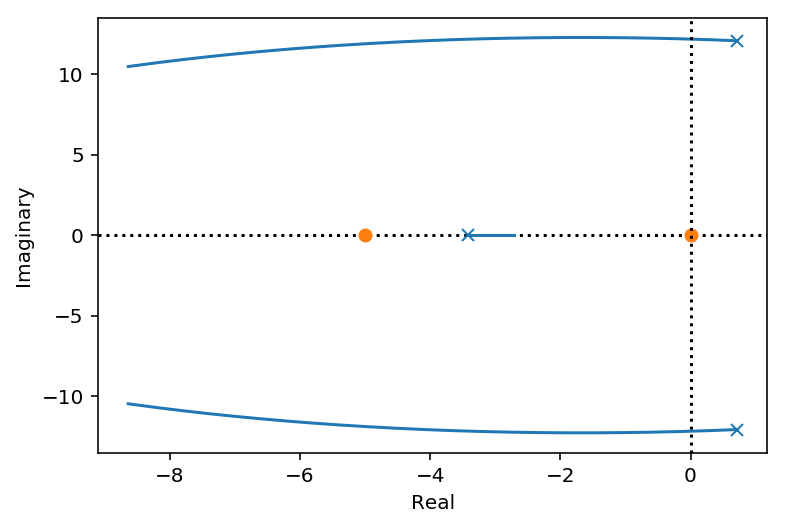

In [318]:
c.rlocus(F,kvect=sp.linspace(0,0.2,300),color='green', linestyle='dashed', marker='o',
     markerfacecolor='blue', markersize=12)
plt.show()

In [295]:
help(c.rlocus)

Help on function root_locus in module control.rlocus:

root_locus(sys, kvect=None, xlim=None, ylim=None, plotstr='C0', Plot=True, PrintGain=True, grid=False, **kwargs)
    Root locus plot
    
    Calculate the root locus by finding the roots of 1+k*TF(s)
    where TF is self.num(s)/self.den(s) and each k is an element
    of kvect.
    
    Parameters
    ----------
    sys : LTI object
        Linear input/output systems (SISO only, for now)
    kvect : list or ndarray, optional
        List of gains to use in computing diagram
    xlim : tuple or list, optional
        control of x-axis range, normally with tuple (see matplotlib.axes)
    ylim : tuple or list, optional
        control of y-axis range
    Plot : boolean, optional (default = True)
        If True, plot root locus diagram.
    PrintGain: boolean (default = True)
        If True, report mouse clicks when close to the root-locus branches,
        calculate gain, damping and print
    grid: boolean (default = False)
     

In [227]:
Tl=0.45
gz=c.c2d(g2,Tl)
c.bode(2.12*g2, Hz=False)
f=plt.gcf()
py.iplot_mpl(f)
K=33/gz.horner(1)
print(K)
wik=0.248
a=10**(-18.8/20)
Ta=10/wik/a
sarea=(1+a*Ta*s)/(1+Ta*s)
sareaz=c.c2d(sarea,Tl, method='tustin')

[[3.33337931+0.j]]


In [251]:
Ta

351.19499595003253

In [224]:
21/gz.horner(1)

array([[2.12124138+0.j]])

In [37]:
sp.where(data[1]==(-120*sp.pi/180+abs(data[1]-(-120*sp.pi/180)).min()))

(array([429]),)

In [41]:
data[2][429]/2/sp.pi

0.042780864961377424

56.68984149367146

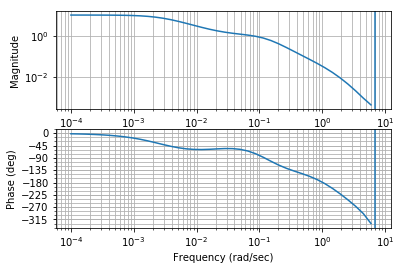

In [60]:
c.bode(gz*sareaz)
c.margins.stability_margins(gz*sareaz)[2]*180/sp.pi

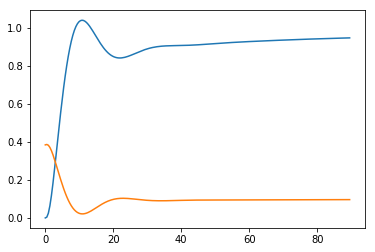

In [81]:
import control.matlab as cm
gi=c.feedback(K[0].real[0]*gz*sareaz,1)
ui=c.feedback(K[0].real[0]*sareaz,gz)
t=sp.r_[0:2000]*Tl
y,t=cm.step(gi,t)
u,t=cm.step(ui,t)
plt.plot(t,y)
plt.plot(t,u)
pass

2


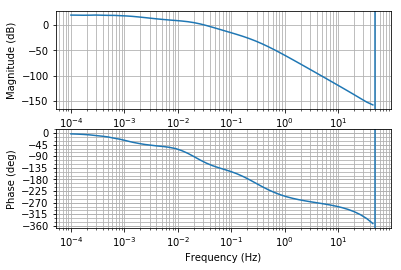

56.63073664650359


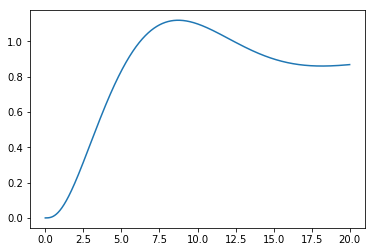

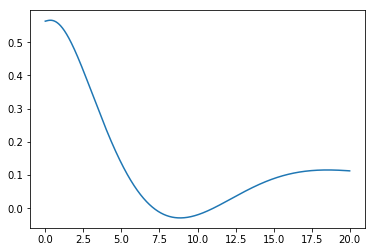

In [205]:
Tl=0.01
gz=c.c2d(g2,Tl)
K=19/gz.horner(1)
K=2
print(K)
wik=0.051*2*sp.pi
a=10**(-11/20)
Ta=10/wik/a
sarea=(1+a*Ta*s)/(1+Ta*s)
sareaz=c.c2d(sarea,Tl, method='tustin')
c.bode(gz*sareaz)
plt.show()
#print(c.margins.stability_margins(K[0].real[0]*gz*sareaz)[2]*180/sp.pi)
print(c.margins.stability_margins(1*gz*sareaz)[2]*180/sp.pi)
#gi=c.feedback(K[0].real[0]*gz*sareaz,1)
#ui=c.feedback(K[0].real[0]*sareaz,gz)
gi=c.feedback(K*gz*sareaz,1)
ui=c.feedback(K*sareaz,gz)
t=sp.r_[0:2000]*Tl
y,t=cm.step(gi,t)
u,t=cm.step(ui,t)
plt.plot(t,y)
plt.show()
plt.plot(t,u)

In [160]:
sareaz


0.197 z - 0.1948
----------------
   z - 0.9978

dt = 0.44

In [264]:
gi=c.feedback(c.series(g3,gp))
y,t=cm.step(gi)
plt.plot(t,y)
f=plt.gcf()
py.iplot_mpl(f)
data=c.bode(c.series(g3,gp), sp.logspace(-2,1,1000))
f=plt.gcf()
py.iplot_mpl(f)

Tl=0.008
gz=c.c2d(g3,Tl)
gcz=c.c2d(gp,Tl,method='tustin')
gi=c.feedback(c.series(2*gz,gcz))
y,t=cm.step(gi,sp.r_[0:100]*Tl)
plt.plot(t,y)
f=plt.gcf()
py.iplot_mpl(f)



In [220]:
print(1/(1+c.dcgain(gz*gcz)))
c.rlocus(gz*gcz)
c.grid=True
f=plt.gcf()
py.iplot_mpl(f)

(0.005178771788198845+0j)


/Users/josu/anaconda3/lib/python3.7/site-packages/plotly/matplotlylib/mplexporter/exporter.py:84: UserWarning:

Blended transforms not yet supported. Zoom behavior may not work as expected.

/Users/josu/anaconda3/lib/python3.7/site-packages/plotly/matplotlylib/renderer.py:390: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!



In [268]:
s1=(-4.5+0.1*1j)
rho=sp.pi-sp.angle(g1.horner(s1))
Td=1/(s1.imag/sp.tan(rho)-s1.real)
print(sp.angle(((1+Td[0][0]*s)*g1).horner(s1)))
K=1/abs(((1+Td[0][0]*s)*g1).horner(s1))

[[1.03253586e-15]]


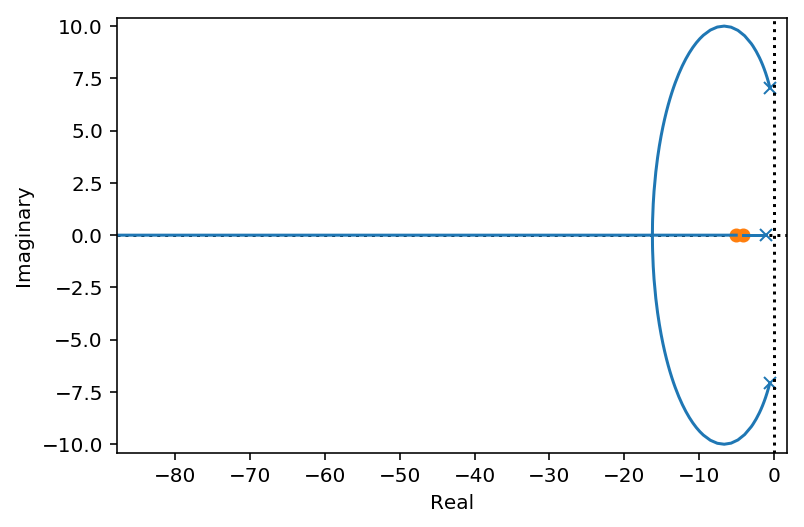

In [272]:
c.rlocus((1+Td[0][0]*s)*g1)
pass

In [273]:
g1i=c.feedback(90*(1+Td[0][0]*s)*g1,1)
y,t=cm.step(g1i)
plt.plot(t,y)
f=plt.gcf()
py.iplot_mpl(f)

In [277]:
a=10**(-13/20)
wik=0.27
Ta=10/wik/a
Ta

165.43836746331968

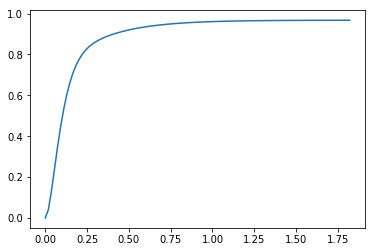

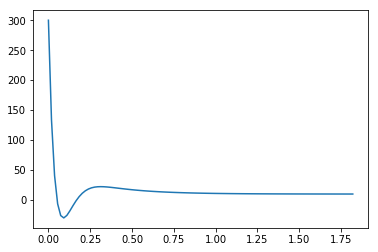

In [146]:
g1i=c.feedback(300*g1,(1+0.13*s))
gui=c.feedback(300,(1+0.13*s)*g1)
y,t=cm.step(g1i)
u,t=cm.step(gui)
plt.plot(t,y)
plt.show()
pass
plt.plot(t,u)

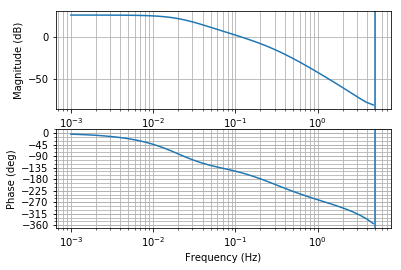

2


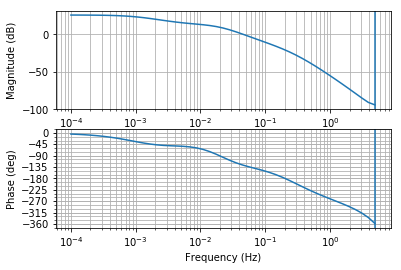

55.932819487257355


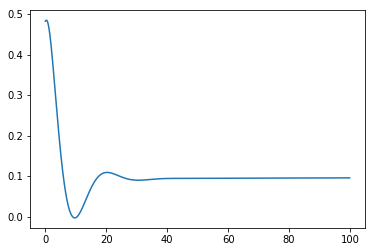

In [202]:
Tl=0.1
gz=c.c2d(g2,Tl)
K=19/gz.horner(1)
K=2
c.bode(2*gz)
plt.show()
print(K)
wik=0.04606*2*sp.pi
a=10**(-12.36/20)
Ta=10/wik/a
sarea=(1+a*Ta*s)/(1+Ta*s)
sareaz=c.c2d(sarea,Tl, method='tustin')
c.bode(2*gz*sareaz)
plt.show()
#print(c.margins.stability_margins(K[0].real[0]*gz*sareaz)[2]*180/sp.pi)
print(c.margins.stability_margins(2*gz*sareaz)[2]*180/sp.pi)
#gi=c.feedback(K[0].real[0]*gz*sareaz,1)
#ui=c.feedback(K[0].real[0]*sareaz,gz)
gi=c.feedback(K*gz*sareaz,1)
ui=c.feedback(K*sareaz,gz)
t=sp.r_[0:1000]*Tl
y,t=cm.step(gi,t)
u,t=cm.step(ui,t)
plt.plot(t,y)
f=plt.gcf()
py.iplot_mpl(f)
plt.plot(t,u)

In [194]:
Ta

51.24063292752979

In [265]:
c.rlocus(90*g1)
d=0.6
wd=7.85
ww=sp.r_[50,0]
p1=(-d+sp.sqrt(d**2-1))*ww
plt.plot(p1.real,p1.imag)
p2=-ww+wd*1j
plt.plot(p2.real,p2.imag)
plt.show()
Kp=0.4631;Td=0.1974
gi=c.feedback(Kp*(1+Td*s)*90*g1,1)
t,y=c.step_response(gi)
plt.plot(t,y)
f=plt.gcf()
py.iplot_mpl(f)

/Users/josu/anaconda3/lib/python3.7/site-packages/plotly/matplotlylib/mplexporter/exporter.py:84: UserWarning:

Blended transforms not yet supported. Zoom behavior may not work as expected.

/Users/josu/anaconda3/lib/python3.7/site-packages/plotly/matplotlylib/renderer.py:390: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!



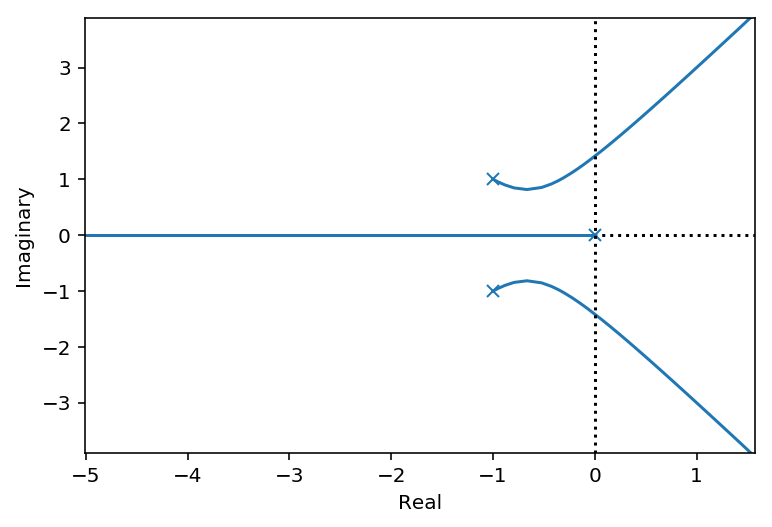

In [263]:
import matplotlib

gol = c.tf(1, [1, 2, 2, 0])
rlist, klist = c.root_locus(gol)